# Downloading music data from spotify API for model retraining for WD internship

For this we made an account in spotify API, we used the client ID and secret key they provided to retrieve data about songs from any year/s that we specify. That data is stored in 2 excel documents (1 containing song information and another one containing audio features). We use that data to train our model initially

In [ ]:
!pip install spotipy
#we use spotipy, a python library to access spotify API

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

#credentials for accessing spotify data from our account

cid = '801b45e323314379a0c0f37a44c40e50'
secret = '1b1a7308c9ed434a8ea9c68299f2bf5f'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

This code is to get the audio features and song data. We can specify which year/years we want the data from by changing the numbers in the for loop below, The same code has been used to get the data for all the years

In [ ]:
# taking yearwise data 
artist_name = []
track_name = []
album_name = [] 
track_id=[]
popularity=[]
h=0
for j in range(2019,2020): #we can change the values here to get different year's data
  k='year:'+str(j)
  for i in range(0,2000,50):
      track_results = sp.search(q=k, type='track', limit=50,offset=i)
      for i, t in enumerate(track_results['tracks']['items']):
          #print(t['album']['name'])
          if h==0:
            print(t)
            h+=1
          artist_name.append(t['artists'][0]['name'])
          track_name.append(t['name'])
          album_name.append(t['album']['name'])          
          track_id.append(t['id'])
          popularity.append(t['popularity'])


{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6KImCVD70vtIoJWnq6nGn3'}, 'href': 'https://api.spotify.com/v1/artists/6KImCVD70vtIoJWnq6nGn3', 'id': '6KImCVD70vtIoJWnq6nGn3', 'name': 'Harry Styles', 'type': 'artist', 'uri': 'spotify:artist:6KImCVD70vtIoJWnq6nGn3'}], 'available_markets': ['AD', 'AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE', 'BG', 'BH', 'BO', 'BR', 'BY', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'KZ', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MD', 'ME', 'MK', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'RS', 'RU', 'SA', 'SE', 'SG', 'SI', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'UA', 'US', 'UY', 'VN', 'XK', 'ZA'], 'external_urls': {'spotify': 'https://open.spotify.com/album/7xV2TzoaVc0ycW7fwBwAml'}, 'href': 'h

In [ ]:
#putting all the data into the dataframe

track_dataframe = pd.DataFrame({'popularity':popularity,'artist_name' : artist_name, 'song_name' : track_name, 'album_names' :album_name ,'track_id':track_id})
print(track_dataframe.shape)
b=track_dataframe['album_names'].values
track_dataframe.head()


(2000, 5)


,popularity,artist_name,song_name,album_names,track_id
0,97,Harry Styles,Watermelon Sugar,Fine Line,6UelLqGlWMcVH1E5c4H7lY
1,92,Roddy Ricch,The Box,Please Excuse Me For Being Antisocial,0nbXyq5TXYPCO7pr3N8S4I
2,91,Surfaces,Sunday Best,Where the Light Is,1Cv1YLb4q0RzL6pybtaMLo
3,88,Juice WRLD,Robbery,Death Race For Love,6Hj9jySrnFppAI0sEMCZpJ
4,89,Arizona Zervas,ROXANNE,ROXANNE,696DnlkuDOXcMAnKlTgXXK


In [ ]:
#saving song info data
track_dataframe.to_excel("song_info1.xlsx") 

In [ ]:
track_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   popularity   2000 non-null   int64 
 1   artist_name  2000 non-null   object
 2   song_name    2000 non-null   object
 3   album_names  2000 non-null   object
 4   track_id     2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.2+ KB


In [ ]:
#no. of artists-track repeated pairs
grouped = track_dataframe.groupby(['artist_name','song_name'], as_index=True).size()
grouped[grouped > 1].count()

54

In [ ]:
track_dataframe.drop_duplicates(subset=['artist_name','song_name'], inplace=True)

In [ ]:
# to show that there are no more repeats
grouped_after_dropping = track_dataframe.groupby(['artist_name','song_name'], as_index=True).size()
grouped_after_dropping[grouped_after_dropping > 1].count()

0

In [ ]:
#[artist_name,song_name] forms a unique key 
track_dataframe[track_dataframe.duplicated(subset=['artist_name','song_name'],keep=False)].count()

popularity     0
artist_name    0
song_name      0
album_names    0
track_id       0
dtype: int64

In [ ]:
# This is done to get the audio features
rows = []
batchsize = 100

for i in range(0,len(track_dataframe['track_id']),batchsize):
    batch = track_dataframe['track_id'][i:i+batchsize]
    feature_results = sp.audio_features(batch)
    for i, t in enumerate(feature_results):
        if t == None:
          continue
        else:
            rows.append(t)
            


In [ ]:
print((rows[0]))

{'danceability': 0.548, 'energy': 0.816, 'key': 0, 'loudness': -4.209, 'mode': 1, 'speechiness': 0.0465, 'acousticness': 0.122, 'instrumentalness': 0, 'liveness': 0.335, 'valence': 0.557, 'tempo': 95.39, 'type': 'audio_features', 'id': '6UelLqGlWMcVH1E5c4H7lY', 'uri': 'spotify:track:6UelLqGlWMcVH1E5c4H7lY', 'track_href': 'https://api.spotify.com/v1/tracks/6UelLqGlWMcVH1E5c4H7lY', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6UelLqGlWMcVH1E5c4H7lY', 'duration_ms': 174000, 'time_signature': 4}


In [ ]:
df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')
print("Shape of the dataset:", df_audio_features.shape)
df_audio_features.head()

Shape of the dataset: (1945, 18)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.548,0.816,0,-4.209,1,0.0465,0.1220,0.0,0.3350,0.557,95.390,audio_features,6UelLqGlWMcVH1E5c4H7lY,spotify:track:6UelLqGlWMcVH1E5c4H7lY,https://api.spotify.com/v1/tracks/6UelLqGlWMcV...,https://api.spotify.com/v1/audio-analysis/6Uel...,174000,4
1,0.896,0.586,10,-6.687,0,0.0559,0.1040,0.0,0.7900,0.642,116.971,audio_features,0nbXyq5TXYPCO7pr3N8S4I,spotify:track:0nbXyq5TXYPCO7pr3N8S4I,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653,4
2,0.878,0.525,5,-6.832,1,0.0578,0.1830,0.0,0.0714,0.694,112.022,audio_features,1Cv1YLb4q0RzL6pybtaMLo,spotify:track:1Cv1YLb4q0RzL6pybtaMLo,https://api.spotify.com/v1/tracks/1Cv1YLb4q0Rz...,https://api.spotify.com/v1/audio-analysis/1Cv1...,158571,4
3,0.685,0.692,2,-5.122,1,0.0457,0.3280,0.0,0.1530,0.578,159.966,audio_features,6Hj9jySrnFppAI0sEMCZpJ,spotify:track:6Hj9jySrnFppAI0sEMCZpJ,https://api.spotify.com/v1/tracks/6Hj9jySrnFpp...,https://api.spotify.com/v1/audio-analysis/6Hj9...,240051,5
4,0.621,0.601,6,-5.616,0,0.1480,0.0522,0.0,0.4600,0.457,116.735,audio_features,696DnlkuDOXcMAnKlTgXXK,spotify:track:696DnlkuDOXcMAnKlTgXXK,https://api.spotify.com/v1/tracks/696DnlkuDOXc...,https://api.spotify.com/v1/audio-analysis/696D...,163636,5


In [ ]:
df_audio_features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [ ]:
a=df_audio_features['id'].values
b=track_dataframe['track_id'].values
c=track_dataframe['popularity']
print(a)

['6UelLqGlWMcVH1E5c4H7lY' '0nbXyq5TXYPCO7pr3N8S4I'
 '1Cv1YLb4q0RzL6pybtaMLo' ... '1qNvE50pMBAB11VtaGGkFD'
 '0CLhMOVhX6TaPpugYkEsge' '50oEtTUNlce4TuZXQoJzXW']


In [ ]:
new_p=[]
for a1,b1 in zip(b,c):
  if a1 in a:
    new_p.append(b1)

df_audio_features['popularity']=new_p

In [ ]:
df_audio_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity
0,0.548,0.816,0,-4.209,1,0.0465,0.1220,0.0,0.3350,0.557,95.390,audio_features,6UelLqGlWMcVH1E5c4H7lY,spotify:track:6UelLqGlWMcVH1E5c4H7lY,https://api.spotify.com/v1/tracks/6UelLqGlWMcV...,https://api.spotify.com/v1/audio-analysis/6Uel...,174000,4,97
1,0.896,0.586,10,-6.687,0,0.0559,0.1040,0.0,0.7900,0.642,116.971,audio_features,0nbXyq5TXYPCO7pr3N8S4I,spotify:track:0nbXyq5TXYPCO7pr3N8S4I,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653,4,92
2,0.878,0.525,5,-6.832,1,0.0578,0.1830,0.0,0.0714,0.694,112.022,audio_features,1Cv1YLb4q0RzL6pybtaMLo,spotify:track:1Cv1YLb4q0RzL6pybtaMLo,https://api.spotify.com/v1/tracks/1Cv1YLb4q0Rz...,https://api.spotify.com/v1/audio-analysis/1Cv1...,158571,4,91
3,0.685,0.692,2,-5.122,1,0.0457,0.3280,0.0,0.1530,0.578,159.966,audio_features,6Hj9jySrnFppAI0sEMCZpJ,spotify:track:6Hj9jySrnFppAI0sEMCZpJ,https://api.spotify.com/v1/tracks/6Hj9jySrnFpp...,https://api.spotify.com/v1/audio-analysis/6Hj9...,240051,5,88
4,0.621,0.601,6,-5.616,0,0.1480,0.0522,0.0,0.4600,0.457,116.735,audio_features,696DnlkuDOXcMAnKlTgXXK,spotify:track:696DnlkuDOXcMAnKlTgXXK,https://api.spotify.com/v1/tracks/696DnlkuDOXc...,https://api.spotify.com/v1/audio-analysis/696D...,163636,5,89


# exploratory analysis

In [ ]:
#we have dropped unique identifiers for the songs
data = df_audio_features.drop(['type','id','uri','track_href','analysis_url'],axis=1)
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
0,0.548,0.816,0,-4.209,1,0.0465,0.1220,0.0,0.3350,0.557,95.390,174000,4,97
1,0.896,0.586,10,-6.687,0,0.0559,0.1040,0.0,0.7900,0.642,116.971,196653,4,92
2,0.878,0.525,5,-6.832,1,0.0578,0.1830,0.0,0.0714,0.694,112.022,158571,4,91
3,0.685,0.692,2,-5.122,1,0.0457,0.3280,0.0,0.1530,0.578,159.966,240051,5,88
4,0.621,0.601,6,-5.616,0,0.1480,0.0522,0.0,0.4600,0.457,116.735,163636,5,89


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1945 non-null   float64
 1   energy            1945 non-null   float64
 2   key               1945 non-null   int64  
 3   loudness          1945 non-null   float64
 4   mode              1945 non-null   int64  
 5   speechiness       1945 non-null   float64
 6   acousticness      1945 non-null   float64
 7   instrumentalness  1945 non-null   float64
 8   liveness          1945 non-null   float64
 9   valence           1945 non-null   float64
 10  tempo             1945 non-null   float64
 11  duration_ms       1945 non-null   int64  
 12  time_signature    1945 non-null   int64  
 13  popularity        1945 non-null   int64  
dtypes: float64(9), int64(5)
memory usage: 212.9 KB


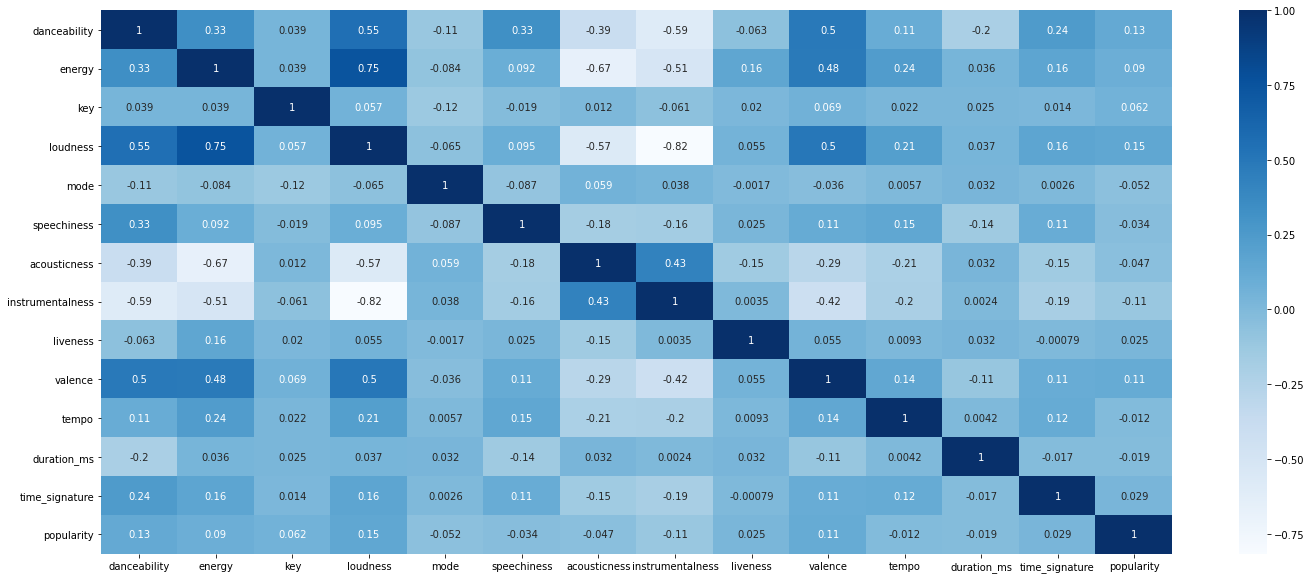

In [ ]:
  #correlatiion matrix of the data
  
  f,ax = plt.subplots(figsize=(24, 10))
  cor = df_audio_features.corr()
  sns.heatmap(cor, annot=True, cmap=plt.cm.Blues, ax=ax)
  plt.show()

In [ ]:
#The correlation of all the features wrt poppularity in ascending order

data_corr = data.corr()['popularity'][:-1] 
golden_features_list = data_corr[abs(data_corr) > 0].sort_values(ascending=False)
print(golden_features_list)

loudness            0.149909
danceability        0.127477
valence             0.113234
energy              0.090008
key                 0.062463
time_signature      0.028665
liveness            0.025053
tempo              -0.011821
duration_ms        -0.019160
speechiness        -0.033636
acousticness       -0.046690
mode               -0.052173
instrumentalness   -0.110384
Name: popularity, dtype: float64


count    1945.000000
mean       69.259640
std         6.527793
min        58.000000
25%        64.000000
50%        68.000000
75%        73.000000
max        97.000000
Name: popularity, dtype: float64


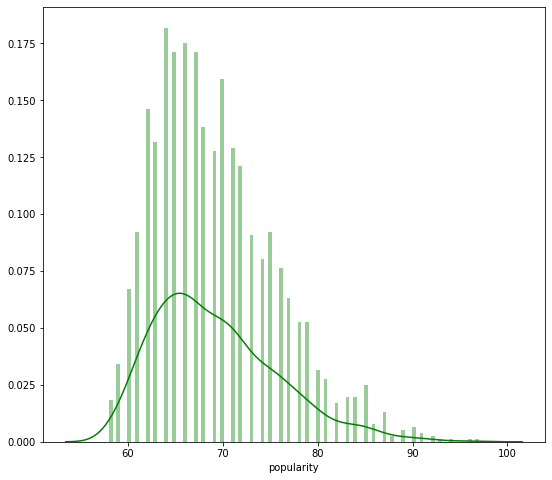

In [ ]:
# distribution of popularity 
# y axis is the franction of the numbers of songs which have that particular poppularity , that is why they are decimals.

print(data['popularity'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['popularity'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
# comparison of energy, liveness, loudness and popularity

result = pd.concat([track_dataframe, data], axis=1, sort=False)
# Generate Charts with Plotly
fig = go.Figure(data = [go.Scatter3d(
    x = result['energy'],
    y = result['loudness'],
    z = result['liveness'],
    text = result['song_name'],  # Additional texts which will be shown
    mode = 'markers',
    marker = dict(
    color = [max(i) for i in list(result['popularity'].values)],
    colorbar_title = 'Popularity',
    colorscale = 'blues'
    )
)])

# Set variables and size
fig.update_layout(width=800, height=800, title = 'Energy, Liveness, Acousticness plot of Songs',
                  scene = dict(xaxis=dict(title='Energy'),
                               yaxis=dict(title='Liveness'),
                               zaxis=dict(title='Acousticness')
                               )
                 )

fig.show()

In [ ]:
# interactive distribution of speechiness

fig = px.histogram(result,
                   x="speechiness",
                  opacity = 1,
                  title = 'Speechiness Histogram',
                  color = list(result['artist_name'].values))
fig.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa19c2d1f98>,
      dtype=object)

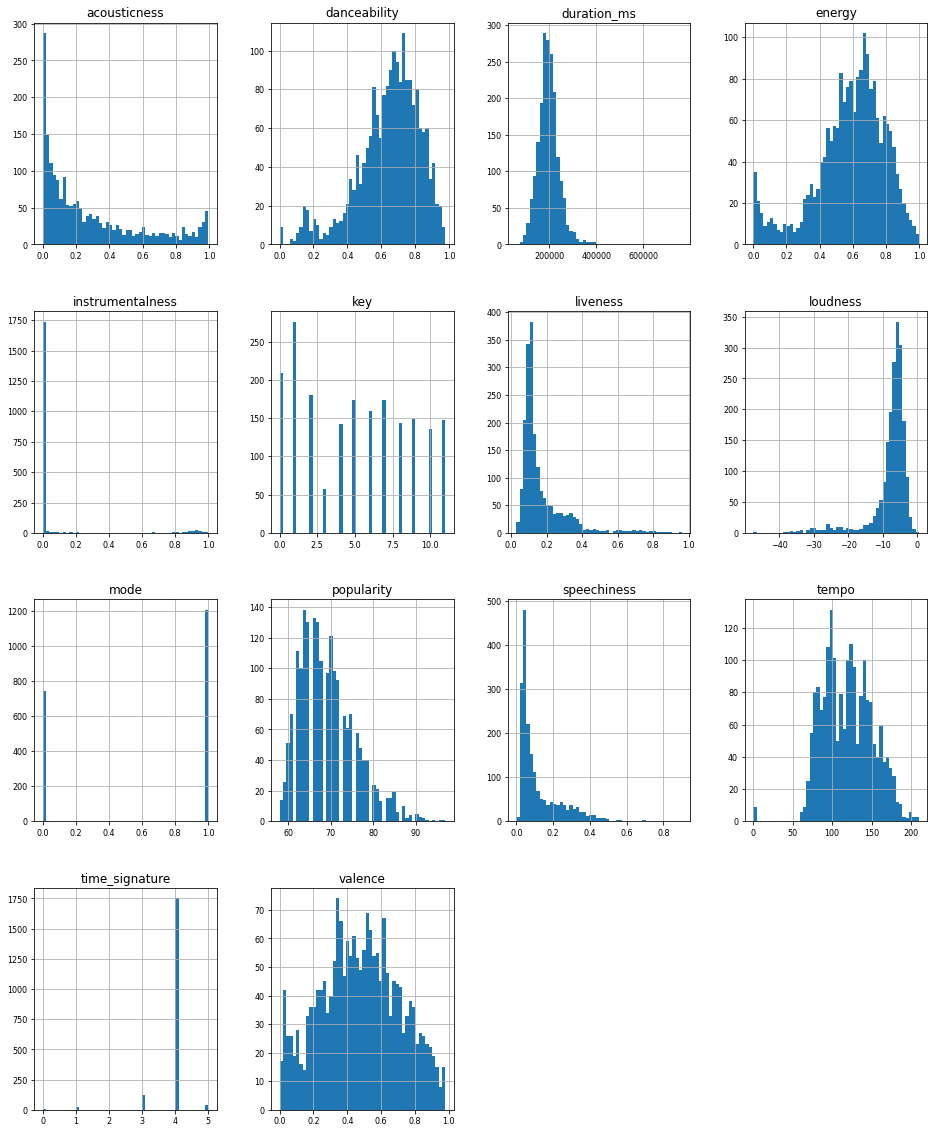

In [ ]:
# distribution of other features
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

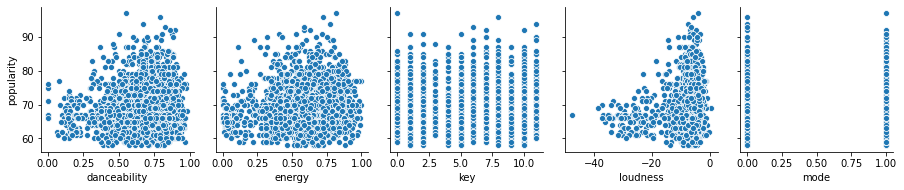

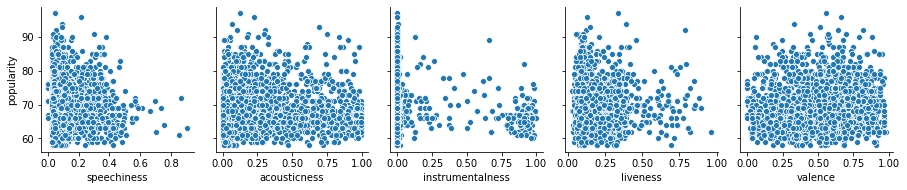

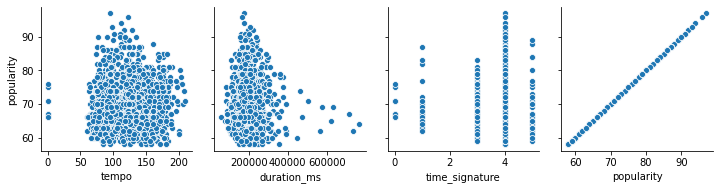

In [ ]:
#scatter plots of features vs. popularity

for i in range(0, len(data.columns), 5):
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+5],
                y_vars=['popularity'])

# what we save

In [ ]:
train = pd.DataFrame(data.iloc[:])

In [ ]:
train.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
0,0.548,0.816,0,-4.209,1,0.0465,0.1220,0.0,0.3350,0.557,95.390,174000,4,97
1,0.896,0.586,10,-6.687,0,0.0559,0.1040,0.0,0.7900,0.642,116.971,196653,4,92
2,0.878,0.525,5,-6.832,1,0.0578,0.1830,0.0,0.0714,0.694,112.022,158571,4,91
3,0.685,0.692,2,-5.122,1,0.0457,0.3280,0.0,0.1530,0.578,159.966,240051,5,88
4,0.621,0.601,6,-5.616,0,0.1480,0.0522,0.0,0.4600,0.457,116.735,163636,5,89


In [ ]:
train.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
1940,0.699,0.633,6,-6.547,1,0.0362,0.04530,0.000000,0.1010,0.458,123.449,184533,4,62
1941,0.737,0.588,8,-4.872,0,0.0467,0.00269,0.000000,0.2760,0.262,150.936,237000,4,64
1942,0.684,0.443,9,-6.196,1,0.0960,0.73000,0.000024,0.2280,0.786,143.237,177195,3,66
1943,0.686,0.720,1,-5.744,1,0.0474,0.02690,0.000000,0.1170,0.323,140.034,213346,4,63
1944,0.720,0.415,0,-9.527,1,0.3540,0.83400,0.000001,0.0893,0.235,94.880,156501,4,66


In [ ]:
train.to_excel("x.xlsx") 
#save the data in excel format

We retrieved the data in the same way for 2015,2016,2017,2018 and 2019 as well and we saved those files